# Implemention of K-Means clustering algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data

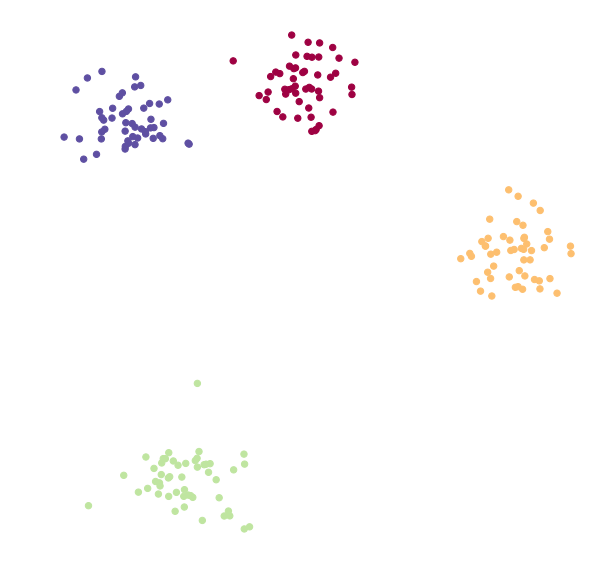

In [2]:
X, y = make_blobs(
    n_samples=200, 
    centers=4, 
    n_features=2, 
    random_state=42
)

fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.axis('off')
plt.show()

## Implementation

In [3]:
def l2(a, b, axis=0):
    x = np.array(a)
    y = np.array(b)
    return np.sqrt(np.power(x - y, 2).sum(axis=axis))

class KMeans():
    
    def __init__(
        self,
        k=2, 
        epochs=1000, 
        distance_fun=l2,
        tol=1e-4
    ):
        self.k = k
        self.epochs = epochs
        self.tol = tol
        
    def fit(self, X):
        
        # Initialise centrois by selecting k data points at random
        data = np.array(X).reshape(len(X), -1)
        mask = np.random.choice(len(data), self.k)
        self.centroids = data[mask]
        self.clusters = np.zeros(data.shape[0])
        not_optimal = True
        epoch = 0
        
        while epoch < self.epochs:
               
            for i in range(data.shape[0]):
                d = [l2(data[i], centroid) for centroid in self.centroids]
                self.clusters[i] = np.argmin(d)
                
            old_centroids = np.copy(self.centroids)
                
            for cluster in range(self.k):
                mask = self.clusters == cluster
                if mask.sum() > 0:
                    self.centroids[cluster] = data[mask].mean(axis=0)
              
            epoch += 1
            
        return self
    
    def predict(self, X):
        pass

In [4]:
kmeans = KMeans(k=4, epochs=3000).fit(X)

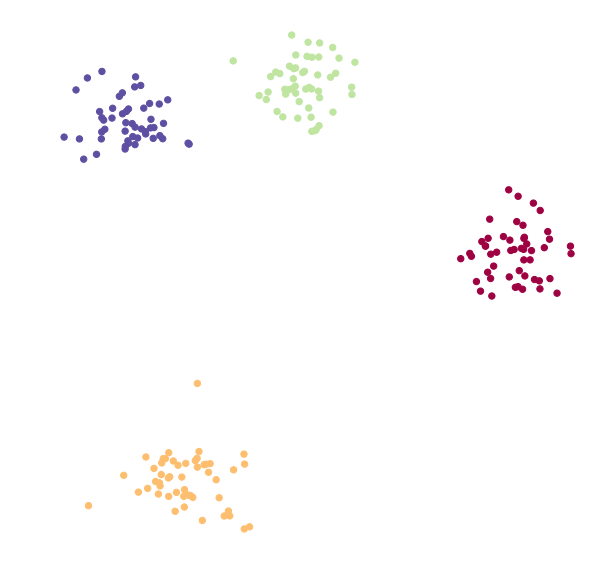

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.clusters, cmap=plt.cm.Spectral)
plt.axis('off')
plt.show()